In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('credit card.csv')

In [50]:
df.shape

(30000, 25)

In [51]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [52]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [53]:
df = df.drop('ID', axis=1)

In [54]:
x = df.drop('default.payment.next.month', axis=1)

In [55]:
y = df['default.payment.next.month']

In [56]:
x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [57]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default.payment.next.month, dtype: int64

# Feature Importance

In [15]:
from sklearn.ensemble import ExtraTreesClassifier

In [16]:
model = ExtraTreesClassifier(n_estimators = 15, criterion='entropy')

In [17]:
model.fit(x,y)

ExtraTreesClassifier(criterion='entropy', n_estimators=15)

In [20]:
feature_importance = model.feature_importances_

In [21]:
feature_importance

array([0.06852417, 0.0126641 , 0.03417072, 0.02494606, 0.0669048 ,
       0.08571936, 0.053579  , 0.01997829, 0.02835937, 0.02672892,
       0.02603186, 0.05148978, 0.04953468, 0.04594979, 0.04537632,
       0.04576932, 0.04618272, 0.04693137, 0.04416543, 0.0436806 ,
       0.04311484, 0.04423617, 0.04596234])

In [22]:
best_features = pd.Series(model.feature_importances_, index=x.columns)

In [23]:
best_features

LIMIT_BAL    0.068524
SEX          0.012664
EDUCATION    0.034171
MARRIAGE     0.024946
AGE          0.066905
PAY_0        0.085719
PAY_2        0.053579
PAY_3        0.019978
PAY_4        0.028359
PAY_5        0.026729
PAY_6        0.026032
BILL_AMT1    0.051490
BILL_AMT2    0.049535
BILL_AMT3    0.045950
BILL_AMT4    0.045376
BILL_AMT5    0.045769
BILL_AMT6    0.046183
PAY_AMT1     0.046931
PAY_AMT2     0.044165
PAY_AMT3     0.043681
PAY_AMT4     0.043115
PAY_AMT5     0.044236
PAY_AMT6     0.045962
dtype: float64

In [25]:
best_features.nlargest(25)

PAY_0        0.085719
LIMIT_BAL    0.068524
AGE          0.066905
PAY_2        0.053579
BILL_AMT1    0.051490
BILL_AMT2    0.049535
PAY_AMT1     0.046931
BILL_AMT6    0.046183
PAY_AMT6     0.045962
BILL_AMT3    0.045950
BILL_AMT5    0.045769
BILL_AMT4    0.045376
PAY_AMT5     0.044236
PAY_AMT2     0.044165
PAY_AMT3     0.043681
PAY_AMT4     0.043115
EDUCATION    0.034171
PAY_4        0.028359
PAY_5        0.026729
PAY_6        0.026032
MARRIAGE     0.024946
PAY_3        0.019978
SEX          0.012664
dtype: float64

<AxesSubplot:>

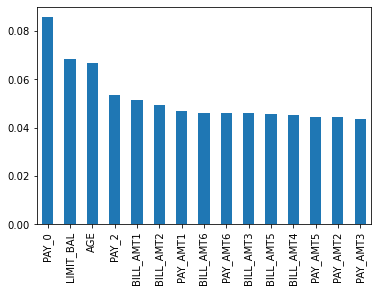

In [30]:
best_features.nlargest(15).plot(kind='bar')

In [31]:
final_x = x.drop(['SEX','PAY_3','PAY_4','PAY_6'],axis=1)

In [32]:
final_x

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_5,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,1,24,2,2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,26,-1,2,0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,34,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,1,37,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,2,1,57,-1,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,3,1,39,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,3,2,43,-1,-1,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,2,2,37,4,3,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,3,1,41,1,-1,0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [33]:
x = final_x

In [34]:
x

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_5,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,1,24,2,2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,26,-1,2,0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,34,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,1,37,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,2,1,57,-1,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,3,1,39,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,3,2,43,-1,-1,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,2,2,37,4,3,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,3,1,41,1,-1,0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [35]:
x.corr()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_5,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.249411,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
EDUCATION,-0.219161,1.000000,-0.143464,0.175061,0.105364,0.121566,0.097520,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200
MARRIAGE,-0.108139,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.035629,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641
AGE,0.144713,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053826,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
PAY_0,-0.271214,0.105364,0.019917,-0.039447,1.000000,0.672164,0.509426,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673
PAY_2,-0.296382,0.121566,0.024199,-0.050148,0.672164,1.000000,0.622780,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500
PAY_5,-0.249411,0.097520,0.035629,-0.053826,0.509426,0.622780,1.000000,0.206684,0.226913,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027
BILL_AMT1,0.285430,0.023581,-0.023472,0.056239,0.187068,0.234887,0.206684,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341
BILL_AMT2,0.278314,0.018749,-0.021602,0.054283,0.189859,0.235257,0.226913,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256
BILL_AMT3,0.283236,0.013002,-0.024909,0.053710,0.179785,0.224146,0.243335,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,0.244335,0.316936,0.130011,0.143405,0.179712,0.182326


In [36]:
corr = x.corr()

<AxesSubplot:>

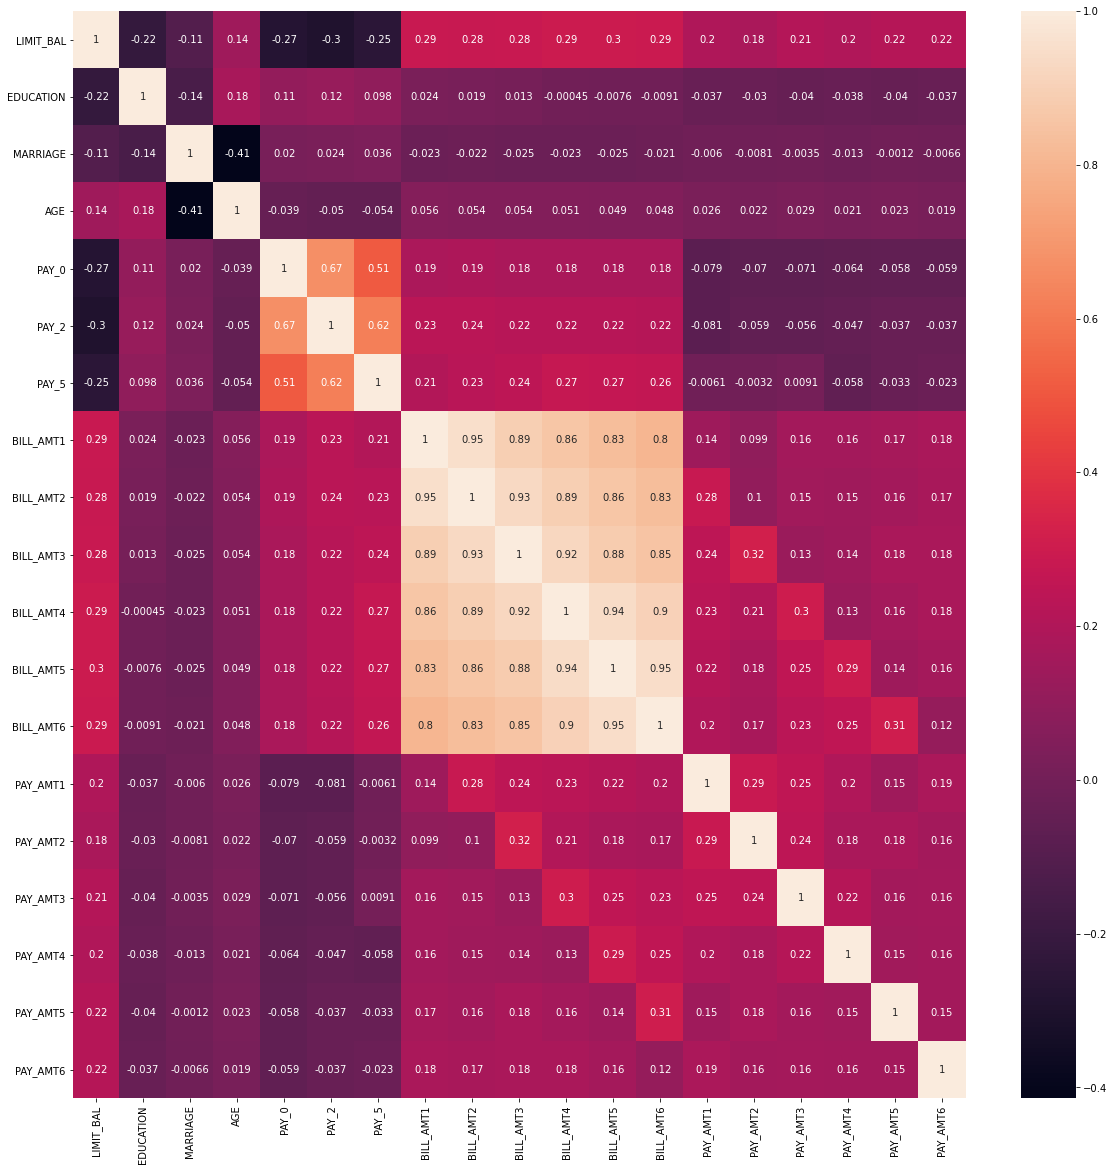

In [40]:
top_features = corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

# Feature Selection: SelectKBest

In [58]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, f_regression

In [59]:
top = SelectKBest(score_func = f_classif, k=18)

In [60]:
top_features = top.fit(x,y)

In [61]:
top_features

SelectKBest(k=18)

In [65]:
feature_df = pd.DataFrame(top_features.scores_ , columns = ['Score Values'])

In [66]:
feature_df

,Score Values
0,724.068539
1,47.978854
2,23.547112
3,17.781271
4,5.788556
5,3537.714970
6,2239.169136
7,1757.466444
8,1476.845967
9,1304.591176


In [71]:
column = pd.DataFrame(x.columns,columns = ['Features Name'] )

In [72]:
column

,Features Name
0,LIMIT_BAL
1,SEX
2,EDUCATION
3,MARRIAGE
4,AGE
5,PAY_0
6,PAY_2
7,PAY_3
8,PAY_4
9,PAY_5


In [74]:
good_features = pd.concat([column,feature_df],axis=1)

In [75]:
good_features

,Features Name,Score Values
0,LIMIT_BAL,724.068539
1,SEX,47.978854
2,EDUCATION,23.547112
3,MARRIAGE,17.781271
4,AGE,5.788556
5,PAY_0,3537.714970
6,PAY_2,2239.169136
7,PAY_3,1757.466444
8,PAY_4,1476.845967
9,PAY_5,1304.591176


In [79]:
good_features.nlargest(10,'Score Values')

,Features Name,Score Values
5,PAY_0,3537.714970
6,PAY_2,2239.169136
7,PAY_3,1757.466444
8,PAY_4,1476.845967
9,PAY_5,1304.591176
10,PAY_6,1085.402485
0,LIMIT_BAL,724.068539
17,PAY_AMT1,160.403810
18,PAY_AMT2,103.291524
20,PAY_AMT4,97.188000
